In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
import time

#找到触电点之后的数据为训练数据
def create_data(csv_id1,csv_id2):
    Data_train = []
    #找触电点步长
    point_find_step = 10
    count = 0
    threshold = 5
    for i in range(csv_id1,csv_id2):
        csv_data = pd.read_csv(open('D:/学习/DataScience/experimrnt/animal/'+str(i)+'.csv'),
                  usecols=[1,5,6])
        csv_data = np.array(csv_data)
    #从触电点开始判断
        left, right = 0, len(csv_data) - 1
        while left < right:
            if abs(csv_data[left,1]) > threshold:
                break
            left = left + point_find_step
        while right > left:
            if abs(csv_data[right,1]) > threshold:
                break
            right = right - point_find_step
        Data_train.extend(csv_data[left:right+1])
        count = count + right - left + 1
    Data_train = np.array(Data_train)
    Data_train = Data_train.reshape(count,3)
    return Data_train,count

#提取一个cvs中所有数据
def get_one_csv(cvs_id):
    csv_data = pd.read_csv(open('D:/学习/DataScience/experimrnt/animal/'+str(cvs_id)+'.csv'),
              usecols=[1,5,6])
    csv_data = np.array(csv_data)
    return csv_data
    
"""       
for i in range(1,2):
    csv_data = pd.read_csv(open('D:/学习/DataScience/experimrnt/animal/'+str(i)+'.csv'),
              usecols=[1,5,6])
    csv_data = np.array(csv_data)
    left, right = 0, len(csv_data) - 1
    while left < right:
        if abs(csv_data[left,1]) > 10:
            break
        left = left + point_find_step
    while right > left:
        if abs(csv_data[right,1]) > 10:
            break
        right = right - point_find_step
    
    X_train.extend(csv_data[left:right+1])
    
    for j in range(len(csv_data)):
        if abs(csv_data[j,1]) > 10:
            count = count+1
            X_train.extend(csv_data[j])
"""
# X_train = np.array(X_train)
# X_train = X_train.reshape(right-left+1,3)
# X_train[:,0] = X_train[:,0] / 100
# print(X_train)
# plt.scatter(X_train[:,0],X_train[:,1],label='1')
# plt.plot(X_train[:,0],X_train[:,1])
# plt.plot(X_train[:,0],X_train[:,2])
# plt.plot(X_train[:,2],X_train[:,1])

"       \nfor i in range(1,2):\n    csv_data = pd.read_csv(open('D:/学习/DataScience/experimrnt/animal/'+str(i)+'.csv'),\n              usecols=[1,5,6])\n    csv_data = np.array(csv_data)\n    left, right = 0, len(csv_data) - 1\n    while left < right:\n        if abs(csv_data[left,1]) > 10:\n            break\n        left = left + point_find_step\n    while right > left:\n        if abs(csv_data[right,1]) > 10:\n            break\n        right = right - point_find_step\n    \n    X_train.extend(csv_data[left:right+1])\n    \n    for j in range(len(csv_data)):\n        if abs(csv_data[j,1]) > 10:\n            count = count+1\n            X_train.extend(csv_data[j])\n"

In [ ]:
# X_train,len_X = create_data(1,9)

In [ ]:
# plt.plot(X_train[:,2],X_train[:,1])
# print(len_X)

In [ ]:
# plt.plot(X_train[:,0],X_train[:,1])
# plt.plot(X_train[:,0],X_train[:,2])

In [ ]:

# clf = SVR(kernel='rbf')
#shape(-1,1)不知道行有多少，按每列一个的形状
# clf.fit(X_train[:,2].reshape(-1,1),X_train[:,1])

In [ ]:
# X_test,len_X = create_data(31,41)
# y_test = clf.predict(X_test[:,2].reshape(len_X,1))
# plt.plot(X_test[:,0],X_test[:,2],label='X_test')
# plt.plot(X_test[:,0],X_test[:,1],label='Y_test')
# plt.plot(X_test[:,0],y_test,label='Y_predict')
# plt.legend()

In [3]:
'''
def evaluate(estimator, train_start, train_end, test_start, test_end):
    X_train,len_X_train = create_data(train_start, train_end)
    time_start = time.clock()
    estimator.fit(X_train[:,2].reshape(-1,1),X_train[:,1])
    X_test,len_X_test = create_data(test_start,test_end)
    y_test = estimator.predict(X_test[:,2].reshape(-1,1))
    time_end = time.clock()
    cost = 0.5*sum((y_test - X_test[:,1])**2)/len_X_test
    print('len_X_train =',len_X_train)
    print('len_X_test =',len_X_test)
    print('loss =',cost)
    print('time cost = %s s'%(time_end-time_start))
'''
#加入归一化，并随机分测试集、训练集
def evaluate(estimator, data_first, data_last, isNormalized = 1):
    X,len_X = create_data(data_first, data_last)
    if isNormalized != 0: 
        #数据归一化处理,线性归一化
        X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
    X_train, X_test, y_train, y_test = train_test_split(X[:,2], X[:,1], test_size=0.25)
    time_start = time.clock()
    estimator.fit(X_train.reshape(-1,1),y_train)
    y_predict = estimator.predict(X_test.reshape(-1,1))
    time_end = time.clock()
    #计算平均损失
    cost = 5000*sum((y_predict - y_test)**2)/len(X_test)
    print('len_X_train =',len(X_train))
    print('len_X_test =',len(X_test))
    print('loss =',cost)
    print('time cost = %s s'%(time_end-time_start))

In [ ]:
# svr = SVR(kernel='rbf')
# evaluate(svr, 1, 21, 31, 41)

In [3]:
dtr = DecisionTreeRegressor()
print('DTR,数据不归一,前80- - - - - - - - - - - - - - - - - - - - - - - ')
evaluate(dtr, 1, 81, isNormalized = 0)

DTR,数据不归一,前80- - - - - - - - - - - - - - - - - - - - - - - 
len_X_train = 109477
len_X_test = 36493
loss = 16057.936252319356
time cost = 0.21352114669969915 s


In [4]:
dtr2 = DecisionTreeRegressor()
print('DTR,数据归一,前80- - - - - - - - - - - - - - - - - - - - - - - ')
evaluate(dtr2, 1, 81, isNormalized = 1)

DTR,数据归一,前80- - - - - - - - - - - - - - - - - - - - - - - 
len_X_train = 109477
len_X_test = 36493
loss = 0.805405939505957
time cost = 0.23017802158909983 s


In [5]:
svr = SVR(kernel='rbf')
print('rbf,数据不归一,前40- - - - - - - - - - - - - - - - - - - - - - - ')
evaluate(svr, 1, 41, isNormalized = 0)

rbf,数据不归一,前40- - - - - - - - - - - - - - - - - - - - - - - 
len_X_train = 54847
len_X_test = 18283
loss = 11655.955230523467
time cost = 408.17188639178903 s


In [6]:
svr2 = SVR(kernel='rbf')
print('rbf,数据归一,前40- - - - - - - - - - - - - - - - - - - - - - - - ')
evaluate(svr2, 1, 41, isNormalized = 1)

rbf,数据归一,前40- - - - - - - - - - - - - - - - - - - - - - - - 
len_X_train = 54847
len_X_test = 18283
loss = 9.321554469034568
time cost = 0.3753855954698224 s


In [7]:
svr3 = SVR(kernel='rbf')
print('rbf,数据归一,前80- - - - - - - - - - - - - - - - - - - - - - - - ')
evaluate(svr3, 1, 81, isNormalized = 1)

rbf,数据归一,前80- - - - - - - - - - - - - - - - - - - - - - - - 
len_X_train = 109477
len_X_test = 36493
loss = 7.503488017437477
time cost = 0.052432489824809636 s


In [8]:
svr4 = SVR(kernel='linear')
print('svr,linear,数据归一,前40- - - - - - - - - - - - - - - - - - - - - - - ')
evaluate(svr4, 1, 41, isNormalized = 1)

svr,linear,数据归一,前40- - - - - - - - - - - - - - - - - - - - - - - 
len_X_train = 54847
len_X_test = 18283
loss = 7.55132323274195
time cost = 0.4932723411785105 s


In [9]:
svr5 = SVR(kernel='linear')
print('svr,linear,数据归一,前80- - - - - - - - - - - - - - - - - - - - - - - ')
evaluate(svr5, 1, 81, isNormalized = 1)

svr,linear,数据归一,前80- - - - - - - - - - - - - - - - - - - - - - - 
len_X_train = 109477
len_X_test = 36493
loss = 3.9840877959081857
time cost = 0.043441160856446004 s


In [10]:
lr = LinearRegression()
print('LinearRegression,数据归一,前80- - - - - - - - - - - - - - - - - - - - - - - ')
evaluate(lr, 1, 81, isNormalized = 1)

LinearRegression,数据归一,前80- - - - - - - - - - - - - - - - - - - - - - - 
len_X_train = 109477
len_X_test = 36493
loss = 3.9775396103208283
time cost = 0.00590550345077645 s


In [4]:
rfr = RandomForestRegressor()
evaluate(rfr, 1, 81, isNormalized = 1)

len_X_train = 109477
len_X_test = 36493
loss = 0.8020046417769066
time cost = 1.2872542912758804 s


In [6]:
knn = KNeighborsRegressor()
evaluate(knn, 1, 81, isNormalized = 1)

len_X_train = 109477
len_X_test = 36493
loss = 0.8579979600521066
time cost = 0.21835108830293848 s


loss = 19149.940126092853


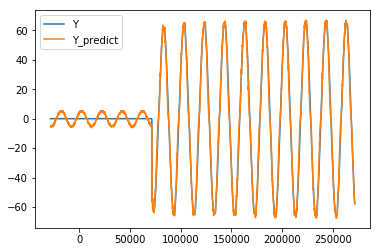

In [11]:
X = get_one_csv(82)
#不做归一化处理
y = dtr.predict(X[:,2].reshape(-1,1))
loss = 0.5*sum((y - X[:,1])**2)
print('loss =',loss)
# plt.plot(X[:,0],X[:,2],label='X')
plt.plot(X[:,0],X[:,1],label='Y')
plt.plot(X[:,0],y,label='Y_predict')
plt.legend()

loss = 1.0269288698242864


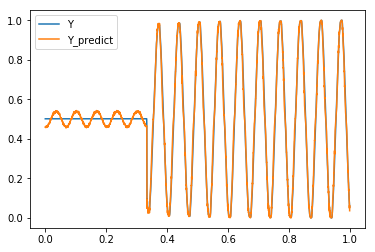

In [12]:
X = get_one_csv(82)
#数据归一化处理,线性归一化
X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
y = dtr2.predict(X[:,2].reshape(-1,1))
loss = 0.5*sum((y - X[:,1])**2)
print('loss =',loss)
# plt.plot(X[:,0],X[:,2],label='X')
plt.plot(X[:,0],X[:,1],label='Y')
plt.plot(X[:,0],y,label='Y_predict')
plt.legend()

loss = 1844482.2729979083


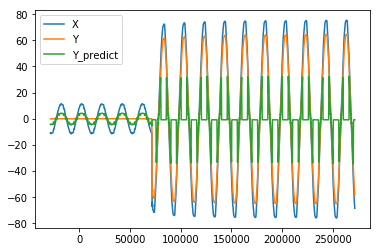

In [13]:
X = get_one_csv(82)
#不做归一化处理,rbf,前40组数据训练
y = svr.predict(X[:,2].reshape(-1,1))
loss = 0.5*sum((y - X[:,1])**2)
print('loss =',loss)
plt.plot(X[:,0],X[:,2],label='X')
plt.plot(X[:,0],X[:,1],label='Y')
plt.plot(X[:,0],y,label='Y_predict')
plt.legend()

loss = 4.908722667846504


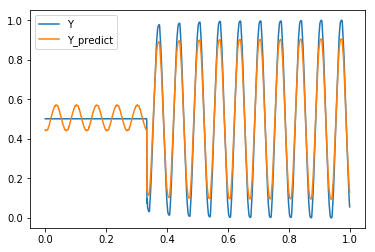

In [14]:
X = get_one_csv(82)
#数据归一化处理,线性归一化,前40组数据训练
X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
y = svr2.predict(X[:,2].reshape(-1,1))
loss = 0.5*sum((y - X[:,1])**2)
print('loss =',loss)
# plt.plot(X[:,0],X[:,2],label='X')
plt.plot(X[:,0],X[:,1],label='Y')
plt.plot(X[:,0],y,label='Y_predict')
plt.legend()

loss = 4.656258685764918


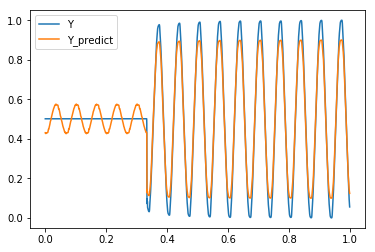

In [15]:
X = get_one_csv(82)
#数据归一化处理,线性归一化,前80组数据训练
X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
y = svr3.predict(X[:,2].reshape(-1,1))
loss = 0.5*sum((y - X[:,1])**2)
print('loss =',loss)
# plt.plot(X[:,0],X[:,2],label='X')
plt.plot(X[:,0],X[:,1],label='Y')
plt.plot(X[:,0],y,label='Y_predict')
plt.legend()

loss = 5.064150450707858


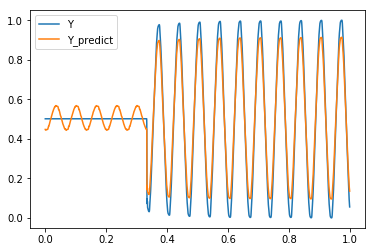

In [16]:
X = get_one_csv(82)
#数据归一化处理,linear,前40组数据训练
X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
y = svr4.predict(X[:,2].reshape(-1,1))
loss = 0.5*sum((y - X[:,1])**2)
print('loss =',loss)
# plt.plot(X[:,0],X[:,2],label='X')
plt.plot(X[:,0],X[:,1],label='Y')
plt.plot(X[:,0],y,label='Y_predict')
plt.legend()

loss = 5.416000725845523


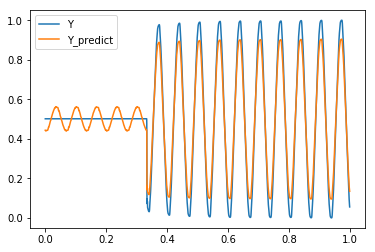

In [17]:
X = get_one_csv(82)
#数据归一化处理,linear,前80组数据训练
X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
y = svr5.predict(X[:,2].reshape(-1,1))
loss = 0.5*sum((y - X[:,1])**2)
print('loss =',loss)
# plt.plot(X[:,0],X[:,2],label='X')
plt.plot(X[:,0],X[:,1],label='Y')
plt.plot(X[:,0],y,label='Y_predict')
plt.legend()

loss = 6.3597060854340395


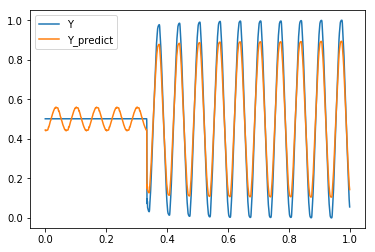

In [18]:
X = get_one_csv(82)
#数据归一化处理,linear,前80组数据训练
X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
y = lr.predict(X[:,2].reshape(-1,1))
loss = 0.5*sum((y - X[:,1])**2)
print('loss =',loss)
# plt.plot(X[:,0],X[:,2],label='X')
plt.plot(X[:,0],X[:,1],label='Y')
plt.plot(X[:,0],y,label='Y_predict')
plt.legend()

loss = 1.0195920326604049


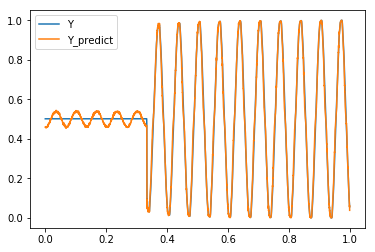

In [5]:
X = get_one_csv(82)
#数据归一化处理,linear,前80组数据训练
X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
y = rfr.predict(X[:,2].reshape(-1,1))
loss = 0.5*sum((y - X[:,1])**2)
print('loss =',loss)
# plt.plot(X[:,0],X[:,2],label='X')
plt.plot(X[:,0],X[:,1],label='Y')
plt.plot(X[:,0],y,label='Y_predict')
plt.legend()

loss = 1.0177239958947786


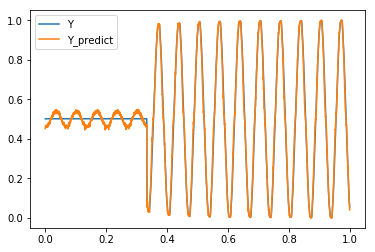

In [7]:
X = get_one_csv(82)
#数据归一化处理,linear,前80组数据训练
X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
y = knn.predict(X[:,2].reshape(-1,1))
loss = 0.5*sum((y - X[:,1])**2)
print('loss =',loss)
# plt.plot(X[:,0],X[:,2],label='X')
plt.plot(X[:,0],X[:,1],label='Y')
plt.plot(X[:,0],y,label='Y_predict')
plt.legend()